<a href="https://colab.research.google.com/github/madhugid/madhugid/blob/main/Chennai_House_Price_Prediction_Decission_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1005]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [1006]:
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale (16).csv


In [1007]:
chpp = pd.read_csv("train-chennai-sale.csv")
chpp.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [1008]:
chpp.shape

(7109, 22)

from the shape of the data frame we can see that there are are 22 features including our target variable and 7109 data points for each feature

In [1009]:
chpp.head().T

,0,1,2,3,4
PRT_ID,P03210,P09411,P01812,P05346,P06210
AREA,Karapakkam,Anna Nagar,Adyar,Velachery,Karapakkam
INT_SQFT,1004,1986,909,1855,1226
DATE_SALE,04-05-2011,19-12-2006,04-02-2012,13-03-2010,05-10-2009
DIST_MAINROAD,131,26,70,14,84
N_BEDROOM,1.0,2.0,1.0,3.0,1.0
N_BATHROOM,1.0,1.0,1.0,2.0,1.0
N_ROOM,3,5,3,5,3
SALE_COND,AbNormal,AbNormal,AbNormal,Family,AbNormal
PARK_FACIL,Yes,No,Yes,No,Yes


Understanding Different features:
PRT_ID, AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE are categorical variables.
INT_SQFT, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM,QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALES_PRICE are numerical variables
DATE_SALE, DATE_BUILD are date variables.

Having a look at data we can understand that PRT_ID seems to be an unique id parameter and a primary key with out much significance or impact on our Target Variable viz SALES_PRICE
Considering the REG_FEE and COMMIS to be registration fee and Commission which is generally decided based upon the SALE_PRICE, these two features doesnt have significant impact on the target variable.


In [1010]:
chpp.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


INT_SQFT seems to have widely distributed data while rest of the numerical features have comparatively low variation.
We can also see that some data points are missing in features N_BEDROOM, N_BATHROOM and QS_Overall

In [1011]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

As can be seen from above information, features viz N_BEDROOM, N_BATHROOM, QS_OVERALL are having some null values.
We also see features of data type object which needs to be converted into numerical format to make them machine readable

In [1012]:
chpp.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

DATA CLEANING & PRE PROCESSING:
In next few steps we will pre process the data

Dealing with null values: QS_overall has around 48 values. N_BEDROOM,N_BATHROOM are having 1 and 5 null values respectively. We need identify a way to clean the data

In [1013]:
chpp["QS_OVERALL"].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [1014]:
chpp["N_BEDROOM"].unique()

array([ 1.,  2.,  3.,  4., nan])

In [1015]:
chpp["N_BEDROOM"].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [1016]:
chpp["N_BATHROOM"].unique
chpp["N_BATHROOM"].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

Based on the above data, df_overall feature is a continuous variable ranging between 2 to 4.97. Here we will be using mean value to replace null values.
N_BEDROOM, N_BATHROOM has 1,2,3,4 and 1,2 as values sucessiely and hence taking mean value is not right decision as we can,t have floating value as no of bedrooms. hence we will use mode value to replace null values


In [1017]:
qs_overallmean = chpp["QS_OVERALL"].mean()
qs_overallmean

3.5032537884152344

In [1018]:
n_bedroom_mode = chpp["N_BEDROOM"].mean()
n_bedroom_mode

1.6370287000562747

In [1019]:
n_bathroom_mode = chpp["N_BATHROOM"].mean(0)
n_bathroom_mode

1.213260135135135

In [1020]:
chpp["QS_OVERALL"].fillna(value = qs_overallmean, inplace = True)


In [1021]:
chpp["N_BEDROOM"].fillna(value = n_bedroom_mode, inplace = True)

In [1022]:
chpp["N_BATHROOM"].fillna(value = n_bathroom_mode, inplace = True)

In [1023]:
chpp.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [1024]:
chpp["PRT_ID"].value_counts()

P03210    1
P01175    1
P07437    1
P06628    1
P02767    1
         ..
P01279    1
P00654    1
P03895    1
P02662    1
P09794    1
Name: PRT_ID, Length: 7109, dtype: int64

By looking at the feature PRT_ID we can understand that each and every value of the feature is unique indicating it to be an id column with out much significance in influencing the target variable. Hence it is better to drop the column.
As the REG_Fee (Registration Fee), COMMIS(Commission) doesn't decide the sale price but will be derived from the sales price, It will be better to drop the features. 

In [1025]:
chpp.drop(["PRT_ID","REG_FEE","COMMIS"], axis = 1, inplace = True)
chpp.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


As the house of sale price is determined based on the age of house rather than based on year it is build or sold, it is better to calculate the age of house as new feature and drop the build date and sold date

In [1026]:
#Converting DATE_SALE and DATE_BUILD into date format and calculating age of house in years
chpp["DATE_SALE"] = pd.to_datetime(chpp["DATE_SALE"])
chpp["DATE_BUILD"] = pd.to_datetime(chpp["DATE_BUILD"])
chpp["building_life"] = (chpp["DATE_SALE"].dt.year - chpp["DATE_BUILD"].dt.year)

In [1027]:
# Dropping DATE_BUILD and DATE_SALE features
chpp.drop(["DATE_SALE","DATE_BUILD"], inplace = True, axis = 1)
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [1028]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  building_life  7109 non-null   int64  
dtypes: float

In [1029]:
chpp.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life
INT_SQFT,1.000000,0.002022,0.786340,0.515261,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002565,0.001969,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559
N_BEDROOM,0.786340,-0.002565,1.000000,0.755055,0.840280,0.015109,-0.007635,0.015566,0.014172,0.330999,-0.045850
N_BATHROOM,0.515261,0.001969,0.755055,1.000000,0.568564,0.013108,-0.012055,0.013190,0.007877,0.108865,-0.020205
N_ROOM,0.951279,0.002301,0.840280,0.568564,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.015109,0.013108,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012055,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015566,0.013190,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,-0.017971
QS_OVERALL,0.013989,-0.017255,0.014172,0.007877,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,0.012517
SALES_PRICE,0.612125,0.018783,0.330999,0.108865,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,-0.118842


Highest correlation is observed between N_ROOM and INT_SQFT. As it is quite possible that with increase in number of rooms area of the house also increases.

Also good positive correlation is observed between N_ROOM, N_BATHROOM, N_BEDROOM and INT_SQFT

We also observe Significant positive correlation between Target Variable SALE_PRICE and features like INT_SQFT, N_ROOM, N_BEDROOM indicating importance linear relationship.

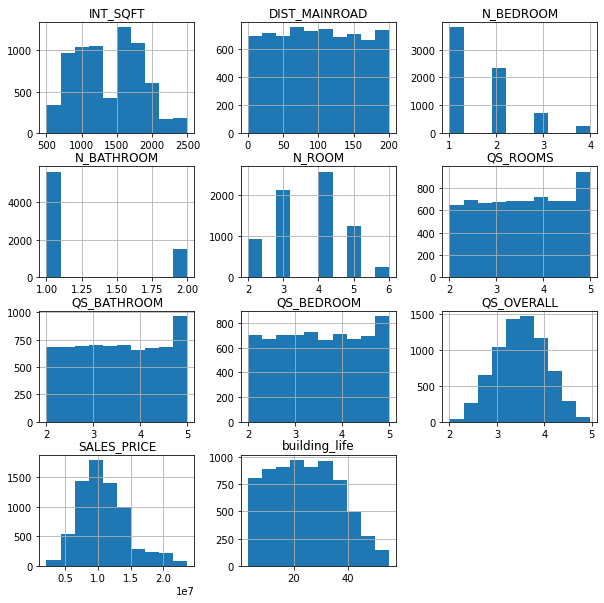

In [1030]:
from matplotlib import pyplot
chpp.hist(figsize=(10,10))
pyplot.show()

Dealing with Categorical features

In [1031]:
chpp["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

By looking at the above data it is clearly understandable that while the actual number of features is actually 6, due to different spellings used the number of unique values for the feature increased to 17. In the next step we will be correcting the spelling so that the feature values indicating the correct values.

In [1032]:
chpp["AREA"] = chpp["AREA"].replace(["Chrompt","Chrmpet","Chormpet"], "Chrompet")
chpp["AREA"] = chpp["AREA"].replace(["Ann Nagar","Ana Nagar"], "Anna Nagar")
chpp["AREA"] = chpp["AREA"].replace(["Velchery","Adyr","KKNagar", "TNagar","Karapakam"],["Velachery","Adyar","KK Nagar","T Nagar","Karapakkam"])
chpp["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [1033]:
chpp["AREA"]

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [1034]:
# sns.barplot(x = "AREA", y = "chpp[AREA].unique(count())", data = chpp, order = chpp.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
# pyplot.ylabel("Sales Price")
# pyplot.xlabel("Locality(AREA)")
# pyplot.xticks(rotation = 90)
# pyplot.title("Relationship between Area and Sales Price")
# pyplot.show()

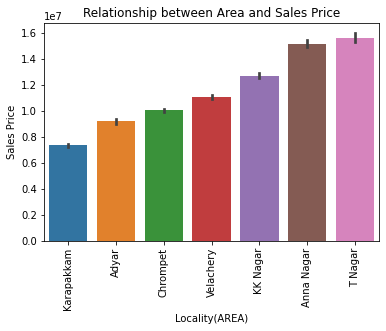

In [1035]:
sns.barplot(x = "AREA", y = "SALES_PRICE", data = chpp, order = chpp.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("Locality(AREA)")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between Area and Sales Price")
pyplot.show()

We can see that the buildings in T Nagar are selling at an higher average price and we can observe a linear relation between Area and Sale price. Hence we can go with label encoding.

In [1036]:
chpp["AREA"]

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [1037]:
AREA_DICT = {"Karapakkam":1, "Adyar":2, "Chrompet":3, "Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7}
chpp['AREA'] = chpp.AREA.map(AREA_DICT)
#chpp.AREA = chpp.AREA.map({"Karapakkam":1, "Adyar":2, "Chrompet":3, "Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7})

In [1038]:
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life
0,1,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [1039]:
chpp["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [1040]:
chpp["SALE_COND"] = chpp["SALE_COND"].replace(["Ab Normal","Partiall","Adj Land", "PartiaLl"],["AbNormal","Partial","AdjLand","Partial"])
chpp["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

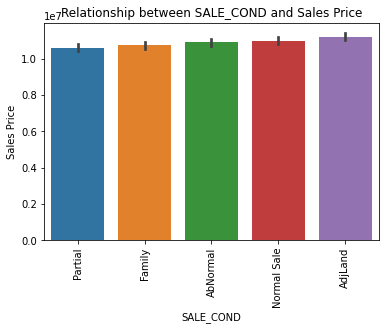

In [1041]:
sns.barplot(x = "SALE_COND", y = "SALES_PRICE", data = chpp, order = chpp.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("SALE_COND")
pyplot.xticks(rotation = 90)
pyplot.title("Relationship between SALE_COND and Sales Price")
pyplot.show()

There is a linear relationship between the feature SALE_COND and Target. Hence we can go with label encoding


In [1042]:
SALE_COND_DICT = {"Partial":1, "Family":2, "AbNormal":3, "Normal Sale":4, "AdjLand":5}
chpp['SALE_COND'] = chpp.SALE_COND.map(SALE_COND_DICT)
chpp["SALE_COND"]

0       3
1       3
2       3
3       2
4       3
       ..
7104    5
7105    2
7106    4
7107    1
7108    1
Name: SALE_COND, Length: 7109, dtype: int64

In [1043]:
chpp["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [1044]:
chpp["PARK_FACIL"] = chpp["PARK_FACIL"].replace(["Noo"], "No")
chpp["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

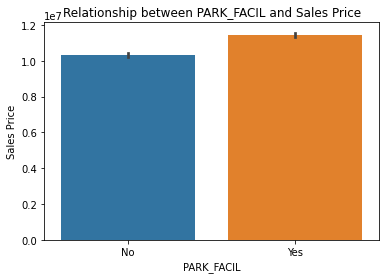

In [1045]:
sns.barplot(x = "PARK_FACIL", y = "SALES_PRICE", data = chpp, order = chpp.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("PARK_FACIL")
pyplot.xticks()
pyplot.title("Relationship between PARK_FACIL and Sales Price")
pyplot.show()

As we have only 2 values for the feature we will be doing binary encoding for this feature


In [1046]:
chpp["PARK_FACIL"] = chpp["PARK_FACIL"].replace({"Yes":1, "No":0})
chpp["PARK_FACIL"]

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7109, dtype: int64

In [1047]:
chpp["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [1048]:
chpp["BUILDTYPE"] = chpp["BUILDTYPE"].replace(["Comercial","Other"],["Commercial","Others"])
chpp["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

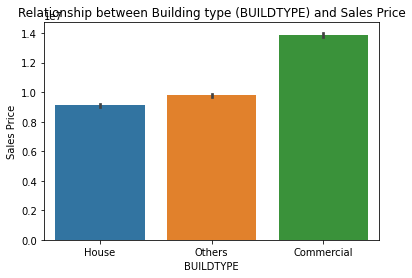

In [1049]:
sns.barplot(x = "BUILDTYPE", y = "SALES_PRICE", data = chpp, order = chpp.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("BUILDTYPE")
pyplot.xticks()
pyplot.title("Relationship between Building type (BUILDTYPE) and Sales Price")
pyplot.show()

We can observed that there is no linear correlation for the feature BUILDTYPE with SALES_PRICE. Hence we will be going with one hot encoding for this feature

In [1050]:
chpp = pd.get_dummies(chpp, columns = ["BUILDTYPE"])
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_life,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1.0,1.0,3,3,1,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2.0,1.0,5,3,0,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1.0,1.0,3,3,1,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3.0,2.0,5,2,0,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1.0,1.0,3,3,1,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1


In [1051]:
chpp['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [1052]:
chpp["UTILITY_AVAIL"] = chpp["UTILITY_AVAIL"].replace(["All Pub","NoSeWa"],["AllPub","NoSewr "])
chpp["UTILITY_AVAIL"].value_counts()

NoSewr     3700
AllPub     1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

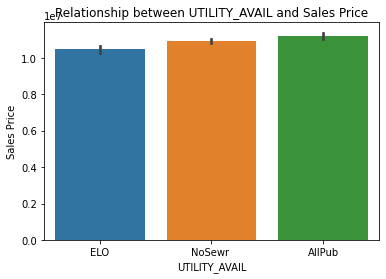

In [1053]:
sns.barplot(x = "UTILITY_AVAIL", y = "SALES_PRICE", data = chpp, order = chpp.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("UTILITY_AVAIL")
pyplot.xticks()
pyplot.title("Relationship between UTILITY_AVAIL and Sales Price")
pyplot.show()

There is a linear relationship between the feature UTILITY_AVAIL and SALES_PRICE. Hence we can go with label encoding.

In [1054]:
from sklearn import preprocessing

In [1055]:
label_encoder = preprocessing.LabelEncoder()
chpp["UTILITY_AVAIL"]= label_encoder.fit_transform(chpp["UTILITY_AVAIL"])
chpp["UTILITY_AVAIL"]

0       0
1       0
2       1
3       2
4       0
       ..
7104    1
7105    2
7106    2
7107    1
7108    1
Name: UTILITY_AVAIL, Length: 7109, dtype: int64

In [1056]:
chpp["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [1057]:
chpp["STREET"] = chpp["STREET"].replace(["Pavd","NoAccess"],["Paved","No Access"])
chpp["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

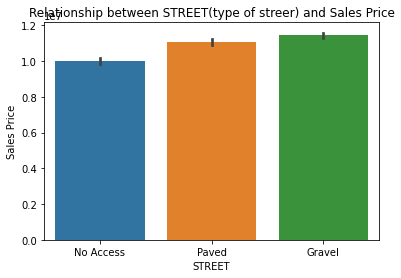

In [1058]:
sns.barplot(x = "STREET", y = "SALES_PRICE", data = chpp, order = chpp.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("STREET")
pyplot.xticks()
pyplot.title("Relationship between STREET(type of streer) and Sales Price")
pyplot.show()

we can observed linear kind of relationship between STREET and SALES_PRICE and hence can go with label encoding

In [1059]:
STREET_DICT = {"No Access":1, "Paved":2, "Gravel":3}
chpp['STREET'] = chpp.STREET.map(STREET_DICT)
chpp["STREET"]

0       2
1       3
2       3
3       2
4       3
       ..
7104    1
7105    1
7106    3
7107    2
7108    2
Name: STREET, Length: 7109, dtype: int64

In [1060]:
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   float64
 4   N_BATHROOM            7109 non-null   float64
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   UTILITY_AVAIL         7109 non-null   int64  
 9   STREET                7109 non-null   int64  
 10  MZZONE                7109 non-null   object 
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7109 non-null   float64
 15  SALES_PRICE          

In [1061]:
chpp["MZZONE"].unique()
chpp["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

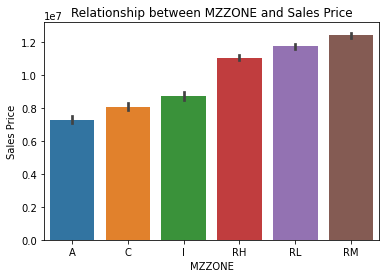

In [1062]:
sns.barplot(x = "MZZONE", y = "SALES_PRICE", data = chpp, order = chpp.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])
pyplot.ylabel("Sales Price")
pyplot.xlabel("MZZONE")
pyplot.xticks()
pyplot.title("Relationship between MZZONE and Sales Price")
pyplot.show()

There is no clear linear relationship between MZ ZONE and SALES_PRICE. However there is an increase in average price based on the zone a building comes into. Also there seems two be 2 categories of ZONE viz(A,C,I) and (RH, RL, RM). We can also observe that the second group average price is higher compared to first group and among the groups there is linear relation between the values.

We will going with one hot encoding for this feature.

In [1063]:
chpp = pd.get_dummies(chpp, columns = ["MZZONE"])
chpp.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,building_life,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1,1004,131,1.0,1.0,3,3,1,0,2,...,44,1,0,0,1,0,0,0,0,0
1,6,1986,26,2.0,1.0,5,3,0,0,3,...,11,1,0,0,0,0,0,1,0,0
2,2,909,70,1.0,1.0,3,3,1,1,3,...,20,1,0,0,0,0,0,0,1,0
3,4,1855,14,3.0,2.0,5,2,0,2,2,...,22,0,0,1,0,0,1,0,0,0
4,1,1226,84,1.0,1.0,3,3,1,0,3,...,30,0,0,1,0,1,0,0,0,0


In [1064]:
#converting the float values into integer format
chpp["QS_ROOMS"] = chpp["QS_ROOMS"].astype(int)
chpp["N_BEDROOM"] = chpp["N_BEDROOM"].astype(int)
chpp["N_BATHROOM"] = chpp["N_BATHROOM"].astype(int)
chpp["QS_BATHROOM"] = chpp["QS_BATHROOM"].astype(int)
chpp["QS_BEDROOM"] = chpp["QS_BEDROOM"].astype(int)
chpp["QS_OVERALL"] = chpp["QS_OVERALL"].astype(int)
chpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DIST_MAINROAD         7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   UTILITY_AVAIL         7109 non-null   int64
 9   STREET                7109 non-null   int64
 10  QS_ROOMS              7109 non-null   int64
 11  QS_BATHROOM           7109 non-null   int64
 12  QS_BEDROOM            7109 non-null   int64
 13  QS_OVERALL            7109 non-null   int64
 14  SALES_PRICE           7109 non-null   int64
 15  building_life         7109 non-null   int64
 16  BUILDT

In [1065]:
from sklearn.preprocessing import StandardScaler

In [1066]:
# scaler = StandardScaler()

In [1067]:
# scaler.fit(chpp)

In [1068]:
# y = chpp["SALES_PRICE"]
# y.head()

In [1069]:
x = chpp.drop(["SALES_PRICE"], axis = 1)
x.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,building_life,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1,1004,131,1,1,3,3,1,0,2,...,44,1,0,0,1,0,0,0,0,0
1,6,1986,26,2,1,5,3,0,0,3,...,11,1,0,0,0,0,0,1,0,0
2,2,909,70,1,1,3,3,1,1,3,...,20,1,0,0,0,0,0,0,1,0
3,4,1855,14,3,2,5,2,0,2,2,...,22,0,0,1,0,0,1,0,0,0
4,1,1226,84,1,1,3,3,1,0,3,...,30,0,0,1,0,1,0,0,0,0


In [1070]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.8)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 245 to 3248
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  5687 non-null   int64
 1   INT_SQFT              5687 non-null   int64
 2   DIST_MAINROAD         5687 non-null   int64
 3   N_BEDROOM             5687 non-null   int64
 4   N_BATHROOM            5687 non-null   int64
 5   N_ROOM                5687 non-null   int64
 6   SALE_COND             5687 non-null   int64
 7   PARK_FACIL            5687 non-null   int64
 8   UTILITY_AVAIL         5687 non-null   int64
 9   STREET                5687 non-null   int64
 10  QS_ROOMS              5687 non-null   int64
 11  QS_BATHROOM           5687 non-null   int64
 12  QS_BEDROOM            5687 non-null   int64
 13  QS_OVERALL            5687 non-null   int64
 14  building_life         5687 non-null   int64
 15  BUILDTYPE_Commercial  5687 non-null   uint8
 16  BUIL

In [1071]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 4734 to 2688
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  1422 non-null   int64
 1   INT_SQFT              1422 non-null   int64
 2   DIST_MAINROAD         1422 non-null   int64
 3   N_BEDROOM             1422 non-null   int64
 4   N_BATHROOM            1422 non-null   int64
 5   N_ROOM                1422 non-null   int64
 6   SALE_COND             1422 non-null   int64
 7   PARK_FACIL            1422 non-null   int64
 8   UTILITY_AVAIL         1422 non-null   int64
 9   STREET                1422 non-null   int64
 10  QS_ROOMS              1422 non-null   int64
 11  QS_BATHROOM           1422 non-null   int64
 12  QS_BEDROOM            1422 non-null   int64
 13  QS_OVERALL            1422 non-null   int64
 14  building_life         1422 non-null   int64
 15  BUILDTYPE_Commercial  1422 non-null   uint8
 16  BUI

In [1072]:
y_train

245     15710400
6776     6906420
2109     7359275
3771    10281375
154     15495760
          ...   
5473    20387660
6383    12053400
3630     5859875
2503     8148875
3248    10905500
Name: SALES_PRICE, Length: 5687, dtype: int64

In [1073]:
y_test

4734     8447030
2905     8480400
1950    12173800
515      9104380
2365     9112450
          ...   
1707     4361500
735      6717750
1415     6450250
1126     9315900
2688    14211600
Name: SALES_PRICE, Length: 1422, dtype: int64

In [1074]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [1076]:
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(round(r2_score(y_test,y_pred),2))

0.93


In [1083]:
y_pred = clf.predict(x_test)
y_pred

array([ 7969078.83285036,  7957813.19510173, 13168279.17878038, ...,
        6811643.94966725,  9137322.44695037, 14682583.50141461])

In [1079]:
clf.coef_


array([ 5.84005830e+05,  1.40665711e+03,  3.39310227e+01, -1.54773855e+06,
        2.42558060e+05,  1.71794035e+06,  1.58060901e+05,  1.02435610e+06,
       -1.09311075e+05,  4.96550715e+05,  7.53016427e+03, -8.58566662e+03,
        4.15984871e+03,  4.96058707e+04, -1.81880530e+04,  2.88716563e+06,
       -1.78240784e+06, -1.10475778e+06, -1.43262177e+06, -8.15798614e+05,
       -2.29937899e+05,  1.95868976e+05,  8.39809440e+05,  1.44267986e+06])

In [1080]:
clf.intercept_

762456.32221145